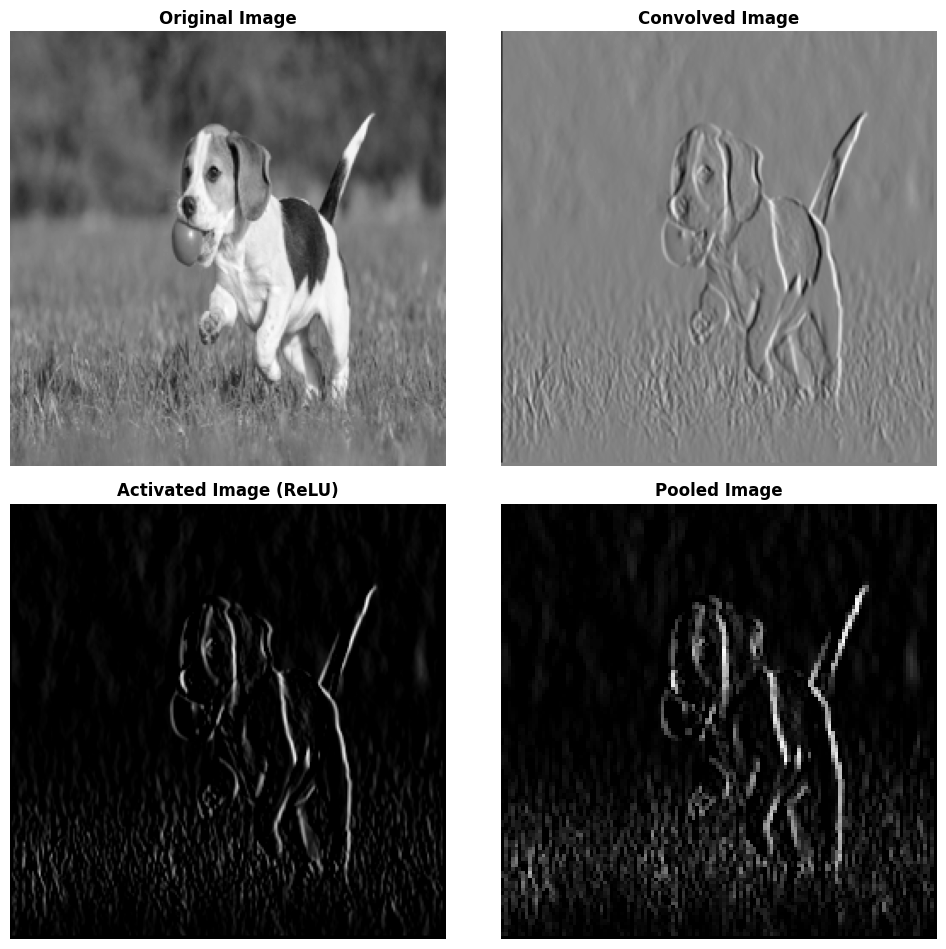

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# O(x,y)=a=−m∑m​b=−n∑n​I(x+a,y+b)⋅K(a,b)
def conv2d(img, filt, pad=1, stride=1):
    filt = np.flipud(np.fliplr(filt))
    kx, ky = filt.shape
    ix, iy = img.shape
    ox = int(((ix - kx + 2 * pad) / stride) + 1)
    oy = int(((iy - ky + 2 * pad) / stride) + 1)
    out = np.zeros((ox, oy))
    if pad != 0:
        padded = np.zeros((img.shape[0] + pad*2, img.shape[1] + pad*2))
        padded[pad:-pad, pad:-pad] = img
    else:
        padded = img
    for y in range(img.shape[1]):
        if y > img.shape[1] - ky:
            break
        if y % stride == 0:
            for x in range(img.shape[0]):
                if x > img.shape[0] - kx:
                    break
                if x % stride == 0:
                    region = padded[x:x + kx, y:y + ky]
                    out[x, y] = (filt * region).sum()
    return out

def relu_layer(x):
    return np.maximum(x, 0)

# spatial resolution in maxpool
def maxpool(x, size=2, stride=2):
    h = int((x.shape[0] - size) / stride) + 1
    w = int((x.shape[1] - size) / stride) + 1
    out = np.zeros((h, w))
    for i in range(0, x.shape[0] - size + 1, stride):
        for j in range(0, x.shape[1] - size + 1, stride):
            region = x[i:i+size, j:j+size]
            out[i//stride, j//stride] = np.max(region)
    return out

if __name__ == "__main__":
    image = Image.open('dog.png').convert('L')
    image = image.resize((256, 256))
    img_arr = np.array(image, dtype=np.float32) / 255.0

    kernel = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)

    conv_out = conv2d(img_arr, kernel, pad=1)
    relu_out = relu_layer(conv_out)
    pool_out = maxpool(relu_out, size=2, stride=2)

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    imgs = [img_arr, conv_out, relu_out, pool_out]
    titles = ['Original Image', 'Convolved Image', 'Activated Image (ReLU)', 'Pooled Image']

    for ax, im, title in zip(axs.flat, imgs, titles):
        ax.imshow(im, cmap='gray')
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()